<font color = 'orange'>

# Hypothesis Test

</font>

* to determine if there is an increase in SG's mean temperatures at a 5% significance level in the past 10 years (2023 vs 2013)
* the data is only based on daily mean temperature readings from Changi weather station
* temperature readings are in Celcius

In [1]:
# import  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load dataset into df
sg_temp = pd.read_csv('dataset/sg_temp.csv')
sg_temp.head()

,station,year,month,day,mean_temperature
0,Changi,2013,1,1,26.9
1,Changi,2013,1,2,27.0
2,Changi,2013,1,3,26.9
3,Changi,2013,1,4,27.2
4,Changi,2013,1,5,27.5


In [3]:
# retrievve descriptive stats
sg_temp.describe(include='all')

,station,year,month,day,mean_temperature
count,730,730.000000,730.000000,730.000000,730.000000
unique,1,NaN,NaN,NaN,NaN
top,Changi,NaN,NaN,NaN,NaN
freq,730,NaN,NaN,NaN,NaN
mean,NaN,2018.000000,6.526027,15.720548,27.909726
std,NaN,5.003428,3.450215,8.802278,1.245635
min,NaN,2013.000000,1.000000,1.000000,23.700000
25%,NaN,2013.000000,4.000000,8.000000,27.200000
50%,NaN,2018.000000,7.000000,16.000000,27.900000
75%,NaN,2023.000000,10.000000,23.000000,28.800000


In [4]:
# check data types
sg_temp.dtypes

station              object
year                  int64
month                 int64
day                   int64
mean_temperature    float64
dtype: object

In [5]:
# check for null values
sg_temp.isnull().sum()

station             0
year                0
month               0
day                 0
mean_temperature    0
dtype: int64

In [6]:
# split dataset into 2023 and 2013 mean temperature readings
sg_temp_2023 = sg_temp[sg_temp['year'] == 2023]
sg_temp_2013 = sg_temp[sg_temp['year'] == 2013]

In [15]:
# retrieve the shape of both dataframes
sg_temp_2023.shape, sg_temp_2013.shape

((365, 5), (365, 5))

In [79]:
# retrieve the mean annual temperatures for year 2023 vs 2013
sg_temp.groupby('year')[['mean_temperature']].agg('mean')

,mean_temperature
year,
2013,27.654795
2023,28.164658


<br><br>

## Plot visual graphs

''

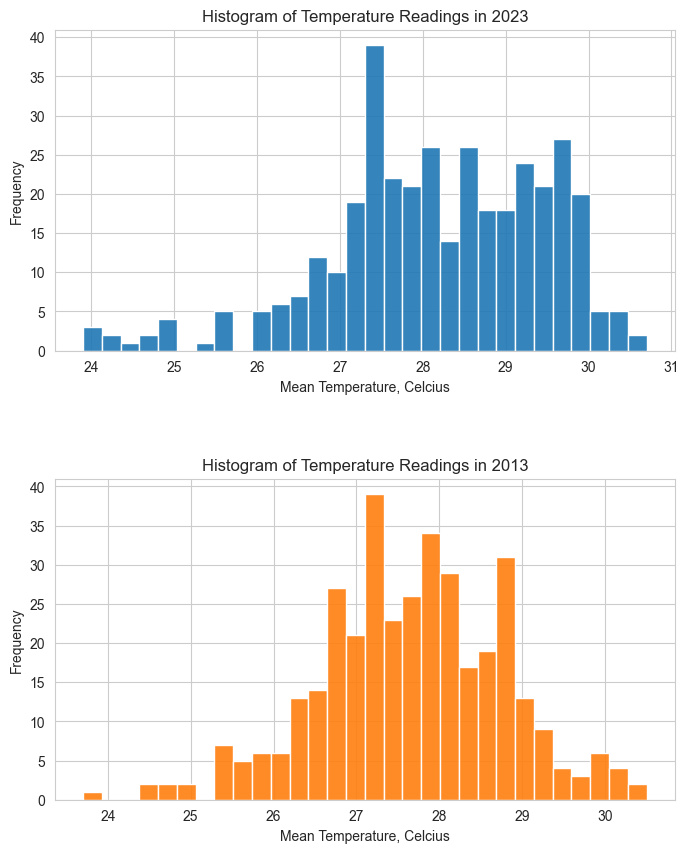

In [67]:
# plot the histograms for 2023 and 2013 daily mean temperature readings
sns.set_style('whitegrid')

fig, (ax2023, ax2013) = plt.subplots(2, 1, figsize=(8, 10))

ax2023 = sns.histplot(
    sg_temp_2023['mean_temperature'],
    bins=30,
    alpha=0.9,
    ax=ax2023
)

ax2013 = sns.histplot(
    sg_temp_2013['mean_temperature'],
    bins=30,
    alpha=0.9,
    color='tab:orange',
    ax=ax2013
)

ax2023.set_title('Histogram of Temperature Readings in 2023')
ax2023.set_xlabel('Mean Temperature, Celcius')
ax2023.set_ylabel('Frequency')

ax2013.set_title('Histogram of Temperature Readings in 2013')
ax2013.set_xlabel('Mean Temperature, Celcius')
ax2013.set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.4) 
;

<br><br>

## Shapiro-wilk test
* determine whether both datasets are normally distributed
* 5% significance level, alpha = 0.05

In [69]:
# conduct the shapiro-wilk test on both 2023 and 2013
stat_2023, pvalue_2023 = stats.shapiro(sg_temp_2023['mean_temperature'])
stat_2013, pvalue_2013 = stats.shapiro(sg_temp_2013['mean_temperature'])

pvalue_2023, pvalue_2013

(6.136404806511564e-08, 0.1844138503074646)

* since the p-value for 2023 is below the 5% significance level, the 2023 dataset is not normally distributed
* however, since the sample size is large, we can still proceed with using the t-test
* in addition, we will also conduct the mann-whitney u test for a more robust analysis

<br><br>

## Levene test
* determine whether both datasets have different variances
* 5% significance level, alpha = 0.05

In [71]:
# conduct the levene test
l_stat, l_pvalue = stats.levene(sg_temp_2023['mean_temperature'], sg_temp_2013['mean_temperature'])
l_pvalue

0.002984395972661087

* since the p-value < 5% significance level, both datasets have different variances

<br><br>

## Two-sample right-tailed t-test

- null hypothesis = annual mean temperatures in 2023 is not greater than in 2013
- alternative hypothesis = annual mean temperatures in 2023 is greater than in 2013
- significance level = 5%, alpha = 0.05

In [72]:
# conduct the t-test
t_stat, t_pvalue = stats.ttest_ind(sg_temp_2023['mean_temperature'], sg_temp_2013['mean_temperature'], alternative='greater', equal_var=False)
t_pvalue

1.1899787846906019e-08

- p-value < 5% significance level, we reject the null hypothesis
- SG's annual mean temperature in 2023 is greater than in 2013, at a 5% significance level

<br><br>

## Right-tailed mann-whitney u test

- null hypothesis = distribution of daily mean temperatures in 2023 is not greater than in 2013
- alternative hypothesis = distribution of daily mean temperatures in 2023 is greater than in 2013
- significance level = 5%, alpha = 0.05

In [73]:
# conduct the mann-whitney u test
u_stat, u_pvalue = stats.mannwhitneyu(sg_temp_2023['mean_temperature'], sg_temp_2013['mean_temperature'], alternative='greater')
u_pvalue

6.785364141331414e-10

- p=value < 5% significance level, we reject the null hypothesis
- SG's daily mean temperature distribution in 2023 is greater than in 2013, at a 5% significance level

<br><br>

<font color = 'orange'>

## Summary

</font>

- we can conclude that there is an increase in SG's mean temperatures at a 5% significance level, in the past 10 years
- both the annual mean temperature and mean temperature distribution are greater in 2023 than in 2013

<br><br><br><br>

# Acknowledgements
* data courtesy of National Environment Agency (NEA), Singapore